In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np


2023-10-30 18:22:43.461938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 18:22:43.462098: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 18:22:43.463276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 18:22:43.596411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 18:22:45.071181: W tensorflow/compiler/

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = np.array(train_images).reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

In [3]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

In [4]:
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [5]:
model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

2023-10-30 18:22:54.548066: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10


2023-10-30 18:22:55.963640: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301056000 exceeds 10% of free system memory.


375/375 [==============================] - ETA: 0s - loss: 0.6081 - accuracy: 0.8146

2023-10-30 18:23:01.102431: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75264000 exceeds 10% of free system memory.


375/375 [==============================] - 5s 13ms/step - loss: 0.6081 - accuracy: 0.8146 - val_loss: 0.2963 - val_accuracy: 0.9117
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.2528 - accuracy: 0.9215 - val_loss: 0.1986 - val_accuracy: 0.9411
Epoch 3/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1675 - accuracy: 0.9479 - val_loss: 0.1645 - val_accuracy: 0.9517
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1186 - accuracy: 0.9628 - val_loss: 0.1591 - val_accuracy: 0.9526
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0881 - accuracy: 0.9720 - val_loss: 0.1261 - val_accuracy: 0.9636
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.1858 - val_accuracy: 0.9471
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.1452 - val_accuracy: 0.9604
Epoch 8/10

In [6]:
model = get_model()

history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10


2023-10-30 18:23:50.402580: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301056000 exceeds 10% of free system memory.


371/375 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.9134

2023-10-30 18:23:55.481072: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75264000 exceeds 10% of free system memory.


375/375 [==============================] - 5s 13ms/step - loss: 0.2971 - accuracy: 0.9140 - val_loss: 0.1540 - val_accuracy: 0.9566
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1230 - accuracy: 0.9636 - val_loss: 0.1173 - val_accuracy: 0.9667
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0814 - accuracy: 0.9763 - val_loss: 0.0929 - val_accuracy: 0.9734
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.0934 - val_accuracy: 0.9713
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0438 - accuracy: 0.9868 - val_loss: 0.0783 - val_accuracy: 0.9762
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0328 - accuracy: 0.9904 - val_loss: 0.0734 - val_accuracy: 0.9786
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.0803 - val_accuracy: 0.9775
Epoch 8/10

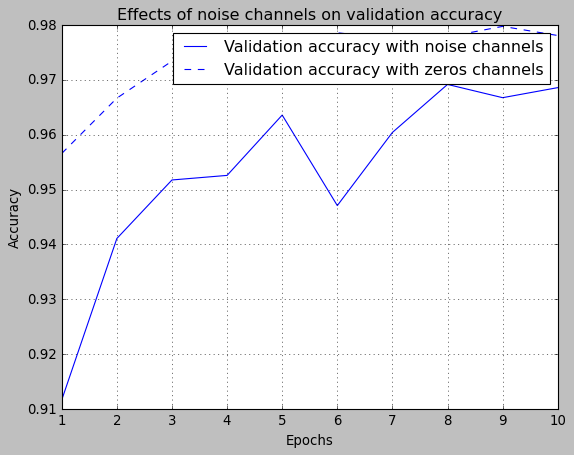

In [12]:
import matplotlib.pyplot as plt

plt.style.use('classic')

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effects of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()